<a href="https://colab.research.google.com/github/SydneyMatheus/topEspTransfImg/blob/main/exercicioTopicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens<br>
Acadêmico: Sydney Matheus de Souza


# Prática com Operações Pontuais e OpenCV




Inicialmente é feito a chamada de todas as bibliotecas necessárias para execução dos códigos dispostos abaixo. Para a execução dos códigos foi considerado que todas as imagens estão em 8 bits, logo os limites de valores para os níveis de itensidade foram assumidos como 256 valores, de 0 a 255, que seria 0 a L-1.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Conversão de imagem RGB em imagem Grayscale


Existem diferentes formas de fazer a conversão de RGB para escalas de cinza (*grayscale*). Abaixo é exibido o método conhecido como "média" (*average*) ou também chamado de básico. Seu princípio é simplesmente pegar a itensidade de cada cor presente em cada canal da imagem RGB e fazer com que cada uma tenha uma contribuição igual para cada canal. Ou seja é feito a razão por três e então o somatório.

O algoritmo segue exatamente esse princípio. Ao fim é feito um *cast* para 8 bits removendo as casas decimais dos valores geradados para cada pixel.

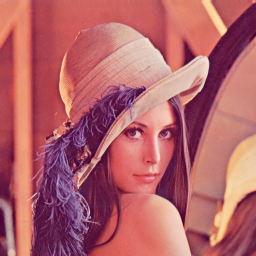

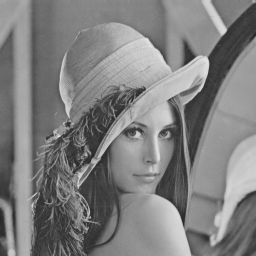

In [12]:
#aplicando conversão básica
img = cv2.imread('/content/lena_color_256.tif')
cv2_imshow(img)

img_grayscale_basic = (img[:,:,0]/3+img[:,:,1]/3+img[:,:,2]/3)

#cast
img_grayscale_basic = np.array(img_grayscale_basic, np.uint8)

cv2_imshow(img_grayscale_basic)

Com a bíblioteca **cv2** é possível simplificar um pouco esse processo elaborado acima fazendo uso da função *split*, essa que divide cada canal com um único comando e pela sintaxe nativa do **python** é possível fazer atribuição em três variáveis diferentes com apenas uma linha de código.

O algoritmo faz exatamente o mesmo demonstrado acima, fazendo a conversão básica para *greyscale* e então um cast para 8bits.

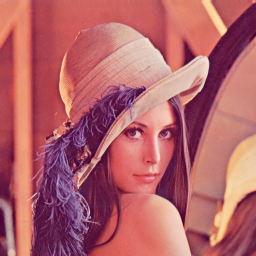

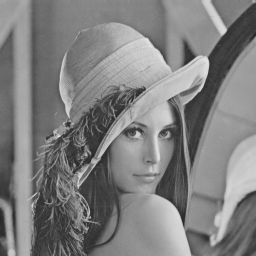

In [13]:
#cv2
img = cv2.imread('/content/lena_color_256.tif')
cv2_imshow(img)

B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = (B/3 + G/3 + R/3)

#cast
img_grayscale_basic = np.array(img_grayscale_basic_cv2, np.uint8)

cv2_imshow(img_grayscale_basic)

A conversão ponderada é um outro método para converter a imagem em escalas de cinza porém ela toma um cuidado maior ao fazer essa conversão e atribui pesos diferentes para cada cor, com intuíto de trazer uma melhor imagem em relação a conversão básica. Os pesos da conversão ponderada não são sempre um padrão, e podem ser modificados de acordo com o que se deseja da imagem. Um método de pesos usado por exemplo pela biblioteca OpenCV é a:<br><br>
\begin{align}
Y = 0.299 × R + 0.587 × G + 0.114 × B
\end{align}
<br><br>
Outro também conhecido é o método luminosidade (*luminosity*) mais sofisticado que leva em consideração a percepção humana das cores. A qual o olho humano tem uma percepção melhor do verde, depois do vermelho e uma percepção não muito boa do azul. Conforme a equação abaixo:<br><br>
\begin{align}
Y = 0.2126 × R + 0.7152 × G + 0.0722 × B
\end{align}
<br><br>
Ou seja a equação faz com que a imagem representada fique com 72% de itensidade para a cor verde (*green* - G), 21% para a vermelho (*red* - R) e apenas 7% para a azul (*blue* - B).

O algoritmo abaixo faz então esse produto acima tendo na matriz a primeira cadamada como o azul ([ : , : , 0]) depois o verde e por último o vermelho. Novamente é feito um *cast* para remover os valores decimais.

Conforme visível abaixo a imagem parece mais viva que a conversão básica demonstada acima.

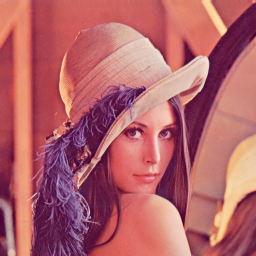

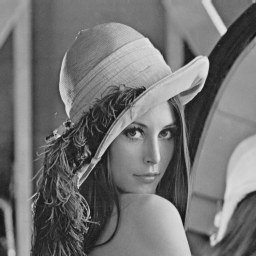

In [14]:
#aplicando conversão ponderada
img = cv2.imread('/content/lena_color_256.tif')
cv2_imshow(img)

img_grayscale_pondered_np = img[:,:,0]*0.07 + img[:,:,1]*0.72 + img[:,:,2]*0.21

#cast
img_grayscale_pondered_np = np.array(img_grayscale_pondered_np, np.uint8)

cv2_imshow(img_grayscale_pondered_np)

Novamente utilizando da biblioteca **cv2** é possível simplificar isso com o método *split*, mas o resultado é o mesmo como já discorrido.

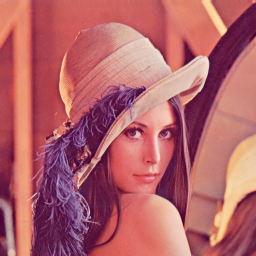

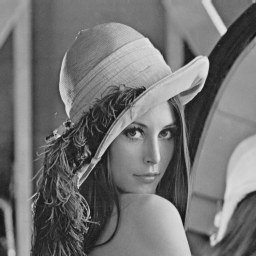

In [15]:
#cv2
img = cv2.imread('/content/lena_color_256.tif')
cv2_imshow(img)

B, G, R = cv2.split(img)
img_grayscale_pondered_cv2 = B*0.07 + G*0.72 + R*0.21

#cast
img_grayscale_pondered = np.array(img_grayscale_pondered_cv2,np.uint8)

cv2_imshow(img_grayscale_pondered)

## Histograma de uma imagem

O histograma de uma imagem nada mais é que a contagem de cada píxel com uma determinada itensidade presente nesta imagem. Ou seja, é uma função h(rₖ) a qual k representa os níveis de itensidade, que variará de 0 até L-1, sendo L-1 a maior intensidade. Assim teremos:<br><br>
\begin{align}
h(rₖ) = nₖ
\end{align}
<br><br>
Fazendo apenas essa contagem direta temos o que é chamado de histograma não normalizado.

O histograma por sí representará a aparência da imagem. Que pode ser identificada de quatro formas básicas como escura, clara, com baixo e alto contraste. Exemplo seja 0 definido como o nível mais escuro, e L-1 o mais claro, uma imagem que tem um histograma totalmente a esquerda representará uma imagem escura.<br><br>
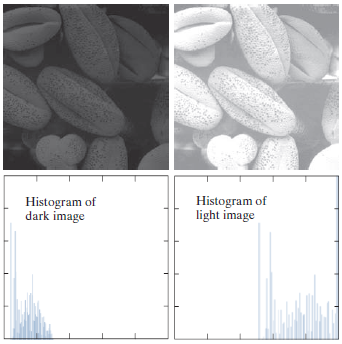

O contrário seria uma imagem clara. Para baixo e alto contraste basta ver se o histograma está concentrado no meio, tendo baixo contraste, ou equilibrado para cada nível na imagem, tendo alto contraste.

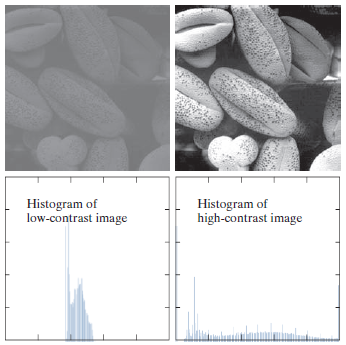

O histograma pode ser feito tanto para imagens coloridas quanto para imagens em escalas de cinza, porém para imagens coloridas (RGB) como existem três canais precisa ser feito um histograma para cor, já que cada uma terá uma intensidade diferente. Em escalas de cinza temos apenas uma itensidade, que é a do cinza, logo temos apenas um.

O algoritmo, que foi limtitado a escalas de cinza, então faz essa contagem a partir de dois laços *for*, onde o retorno da coordenada na imagem será um nível e esse nível será o índice do nosso vetor de histograma. Toda vez que nosso laço passar por esse índice contará mais um, resultado ao fim no gráfico do histograma.


In [16]:
img = cv2.imread('/content/lena_gray_256.tif', 0)
histogram = np.zeros(256)

for i in range (0, img.shape[0]):
  for j in range (0, img.shape[1]):
      #usando o retorno do valor do pixel como índice
      histogram[img[i,j]] += 1

Para o gráfico do histograma está sendo usado a **matplotlib**, bem comum e popular no **python** para plotagem de gráficos. Inicialmente é definido o eixo X que é basicamente uma linha monoespaçada de dois limites, 0 até 255, que é gerado dessa forma a partir da função *linspace* da biblioteca **numpy** (np). Na sequência é usado o comando *bar* para adicionar cada nível em uma barra.

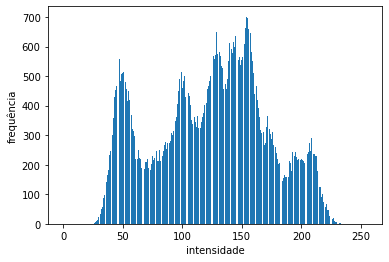

In [17]:
x = np.linspace(0,255,256)
plt.bar(x,histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

Outra forma de fazer o histograma é fazer o histograma normalizado conhecido como apenas histogramas ou histogramas de imagem. Esse leva em conta as dimensões da imagem, e não apenas a contagem de seus níveis. Com o histograma normalizado é possível comparar duas imagens com diferentes dimensões. Pois elas terão uma proporção, diferente do histrograma não normalizado que uma imagem maior, ainda que igual terá uma contagem diferente de pixels e consequentemente terá um histograma diferente.

Para fazer o histograma normalizado basta utilizar o histograma não normalizado e fazer a razão com o número de pixels da imagem. Na equação abaixo sendo o numerador do histograma calculado anteriomente e o denominador a largura e altura da imagem: <br><br>
\begin{align}
p(rₖ)= \frac{nₖ}{M × N}
\end{align}
<br><br>

Imagem com 512/ Imagem de 256



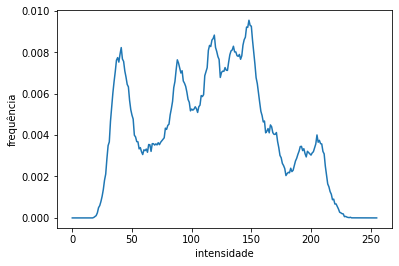
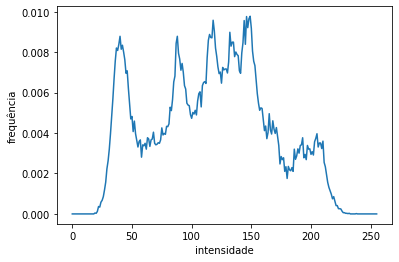

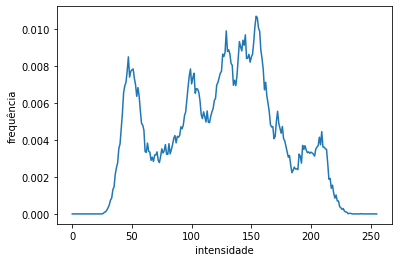

In [18]:
histogram_normalized = histogram[:]/(img.shape[0]*img.shape[1])

x = np.linspace(0,255,256)
plt.plot(x, histogram_normalized)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

Tranformações de intensidade são as transformações mais básica de processamento de imagem. Algumas vezes implementadas via tabelas de *lookups*.

A transformação de imagem para imagem negativa é umas das mais simples transformações onde basta fazer a diferença do maior nível de itensidade L-1, com o pixel em questão da imagem, r.

\begin{align}
s = L - 1 - r
\end{align}

Se a imagem for RGB teremos que fazer a diferença para cada canal. 

O código é bem simples e basicamente faz a diferença do pixel r com o L sendo 255 (ou seja, L-1).

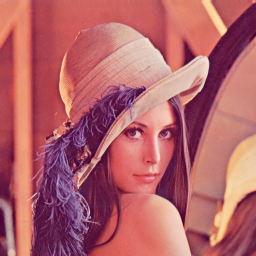

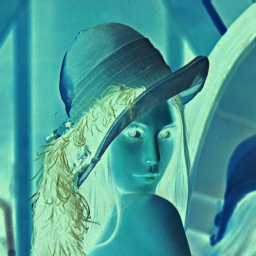

In [19]:
#negativo
img_in = cv2.imread('/content/lena_color_256.tif')
L = 255
img_out = np.zeros(img_in.shape)

img_out[:,:,0] = L - img_in[:,:,0]
img_out[:,:,1] = L - img_in[:,:,1]
img_out[:,:,2] = L - img_in[:,:,2]

cv2_imshow(img_in)
cv2_imshow(img_out)

Transformações de logarítmicas servem para expandir pixels pretos na imagem e comprimir os valores altos. Coforme a equação abaixo temos c sendo uma constante, e o log do pixel da imagem mais 1.


\begin{align}
s=clog(1+r)
\end{align}

Abaixo é apresentado o gráfico da função log, como é possível ver quanto mais itensidade o pixel de entrada tiver mais intensidade ele irá ter na saída.

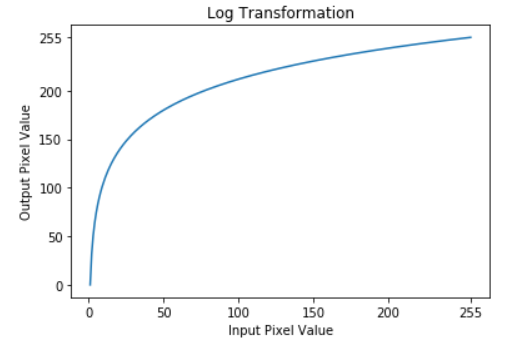

Inicialmente no código é feito a difinição da constante c, que é calculada para não extrapolar 255, em sequência é feito o cálculo do log.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


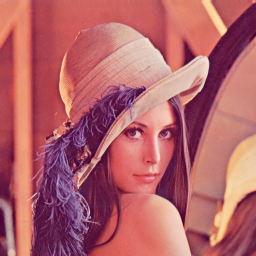

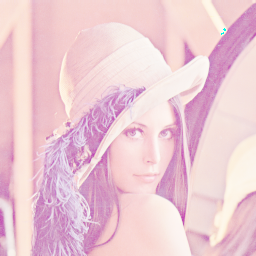

In [20]:
#logaritimica 
img_in = cv2.imread('/content/lena_color_256.tif')

#usando para não extrapolar o valor
c = 255/(np.log(1 + np.max(img_in)))

img_out = np.zeros(img_in.shape)

img_out = c * np.log(1+img_in)

#cast
img_out = np.array(img_out, np.uint8)

cv2_imshow(img_in)
cv2_imshow(img_out)

A transformação lei de potência (*power-law*) também conhecido como *correção gamma* ou *gamma encoding* é usado quase que com o mesmo propósito da transformação logarítmica porém a correção gamma faz com que a sua função tenha diferentes curvas, diferente da log, fazendo ela ser mais versátil. A correção gamma é aplicada em diferentes cenários entre eles um deles usado ainda hoje é a correção dos níveis de intesidade nos monitores. A qual é possível fazer uma correção para uma melhor visualização.

Abaixo está presente a equação onde *c* é uma constante, *r* é o pixel e γ é, conforme o nome sugere, o gamma.

\begin{align}
s=cr^γ
\end{align}




A função gamma possuí valores de 0 a 1 conforme as curvas de sua função representadas abaixo.

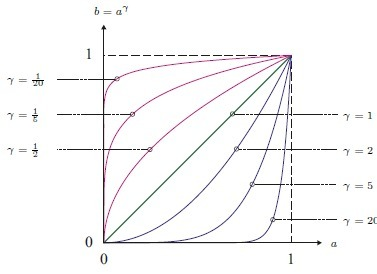

Entratanto nossa imagem assume valores de 0 a 255, para conseguirmos implementar isso em código iremos fazer ima mudança de nossa imagem fazendo a conversão de 0 a 255 para 0 a 1, dividindo nossa imagem por 255, fazendo a elevação, conforme a equação e então retornaremos para o valor de 0 a 255 fazendo a multiplicação ao fim.

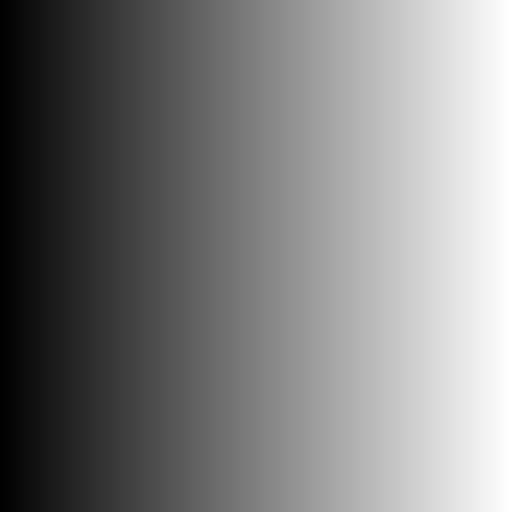

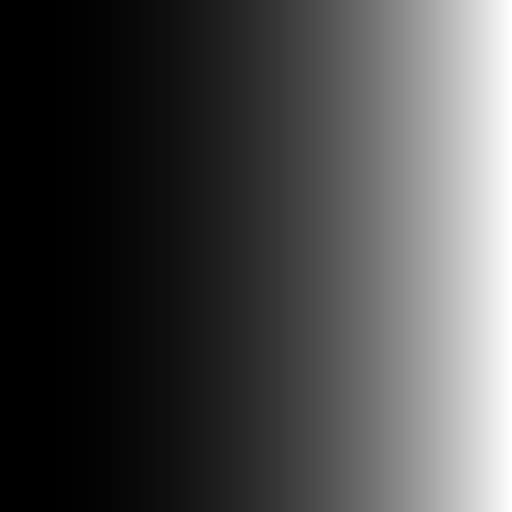

In [21]:
#gamma 
img_in = cv2.imread('/content/Fig0307(a)(intensity_ramp).tif')

c = 255
gamma = 2.5

#cast
img_out = np.array(c*(img_in/255)**gamma, dtype = 'uint8')

cv2_imshow(img_in)
cv2_imshow(img_out)

Conforme visto anteriormente no histograma, imagens que não possuem um equilíbrio de níveis resultam em um baixo contraste. Isso pode ser causado por alguns fatores como baixa iluminação ou uma lente suja, por exemplo. Porém uma técnica que pode inverter isso é o alargamento de contraste (*Contrast Stretching*). Essa técnica expande os níveis presentes na imagem que são definidos como três retas, representadas por 2 pontos explícitos (r1,s1) e (r2, s2), e dois pontos implicitos que são origem (0,0) e fim (L-1,L-1).

Cada reta determinará um contraste diferente, a partir da própria equação da reta para cada pixel na imagem.

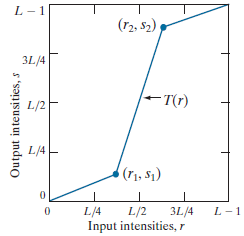

Para o código foi feito a definição dos dois pontos, na sequência é usado dois laços para ser percorrido a matriz e de acordo com cada nível a imagem ganha um contraste determinado pela equação da reta, que está representado pela estrutura condicional *if*/ *else*, para cada uma das retas. O primeiro *if* para a primeira reta, depois para a reta do meio e por fim a reta superior.


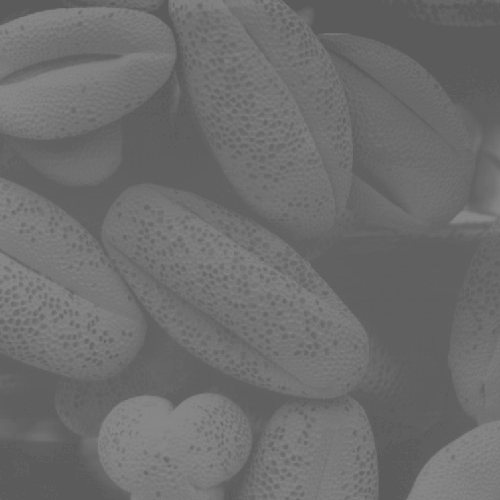

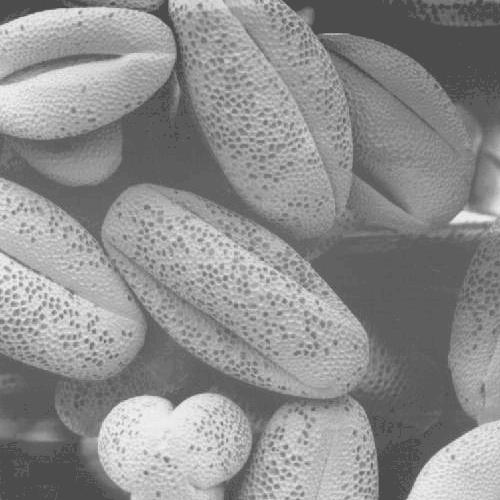

In [22]:
#alargamento de contraste
img_in = cv2.imread('/content/Fig0316(2)(2nd_from_top).tif',0)
img_out = np.zeros(img_in.shape)

r1 = 70
s1 = 0
r2 = 140
s2 = 255

for i in range (0, img_in.shape[0]):
  for j in range (0, img_in.shape[1]):
    if (0 <= img_in[i,j] and img_in[i,j] <= r1):
        img_out[i,j] = (s1 / r1)*img_in[i,j]
    elif (r1 < img_in[i,j] and img_in[i,j] <= r2):
        img_out[i,j]= ((s2 - s1)/(r2 - r1)) * (img_in[i,j] - r1) + s1
    else:
        img_out[i,j]= ((255 - s2)/(255 - r2)) * (img_in[i,j] - r2) + s2

cv2_imshow(img_in)
cv2_imshow(img_out)

O limiar (*thresholding*) é basicamente o alargamento de contrates porém com uma pequena mudança que faz a imagem virar uma imagem binária. Bastando alterar os parâmetros vistos anteriormente.

Fazendo agora r1 = r2, s1 = 0 e s2 = L-1.

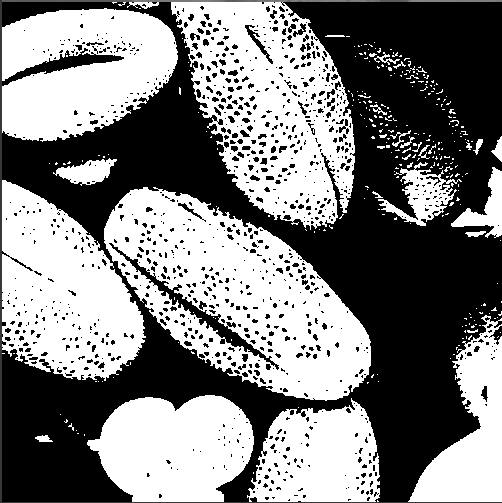



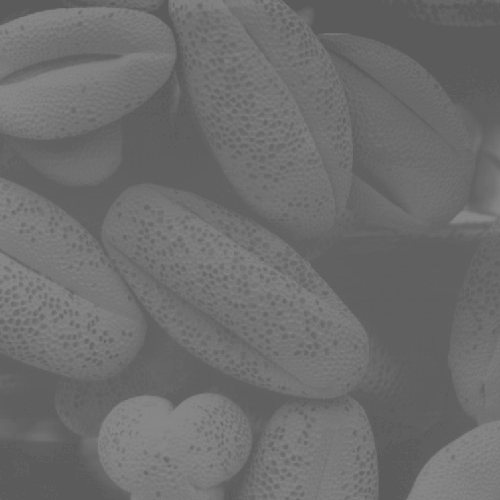

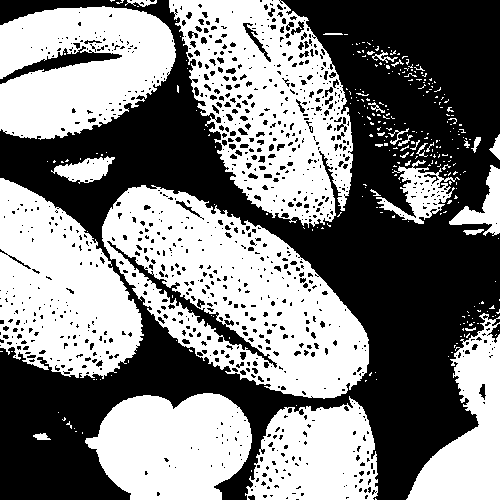

In [23]:
#limiar
img_in = cv2.imread('/content/Fig0316(2)(2nd_from_top).tif',0)
img_out = np.zeros(img_in.shape)

r2 = 109

r1 = r2
s1 = 0
s2 = 255

for i in range (0, img_in.shape[0]):
  for j in range (0, img_in.shape[1]):
    if (0 <= img_in[i,j] and img_in[i,j] <= r1):
        img_out[i,j] = 0
    else:
        img_out[i,j]= 255


cv2_imshow(img_in)
cv2_imshow(img_out)

Uma das tranformações mais simples junto da transformação em negativo. A transformação de contraste e brilho é feita apenas fazendo a multiplicação de um determinado α, que é o contraste (também chamado de *ganho*), pelo pixel da imagem, *r*, somado de um determinado β, que será o brilho (também chamado de *bias*). Conforme a equação abaixo:

\begin{align}
s = α ×r+ β
\end{align}

O código é tão simples quanto a descrição de seu cálculo apenas fazendo a multiplicação e soma para cada canal dos determinados valores de α e β. Os valores de 1 a 3 para α e 0 a 100 para β foi uma recomendação presente no site da OpenCV.

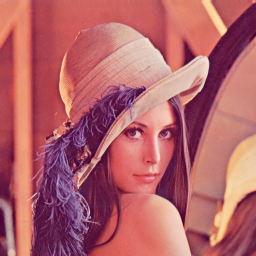

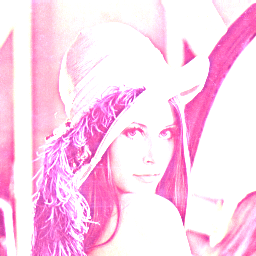

In [24]:
#contraste e brilho
img_in = cv2.imread('/content/lena_color_256.tif')
alpha = 2.2   # 1.0 - 3.0
beta = 50     # 0   - 100

img_out = np.zeros(img_in.shape)

img_out[:,:,0] = np.clip((alpha * img_in[:,:,0]) + beta, 0, 255)
img_out[:,:,1] = np.clip((alpha * img_in[:,:,1]) + beta, 0, 255)
img_out[:,:,2] = np.clip((alpha * img_in[:,:,2]) + beta, 0, 255)

cv2_imshow(img_in)
cv2_imshow(img_out)


Para algumas aplicações é necessário destar certo limites de valores na imagem para uma melhor vizualição de seu conteúdo. O limiar de fatiamento por plano serve para esse caso sendo implementado de diferentes formas. Entre eles o fatiamento definindo um intervalo para ter um valor s enquanto deixa o resto da imagem em 0, conforme o gráfico abaixo. Com um resultado igual ao limiar visto anteriomente.

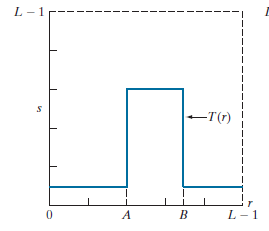

O código funciona praticamente igual o de limiar, mantendo em zero os valores fora dos limites, e para os limites é definido o valor 200, passando por todos os canais a partir dos três laços *for*.

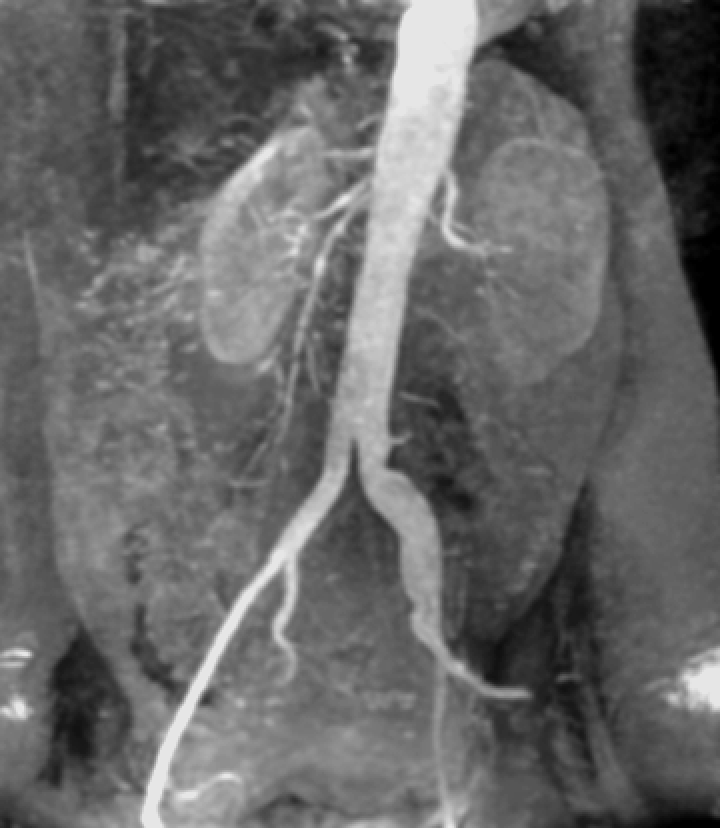

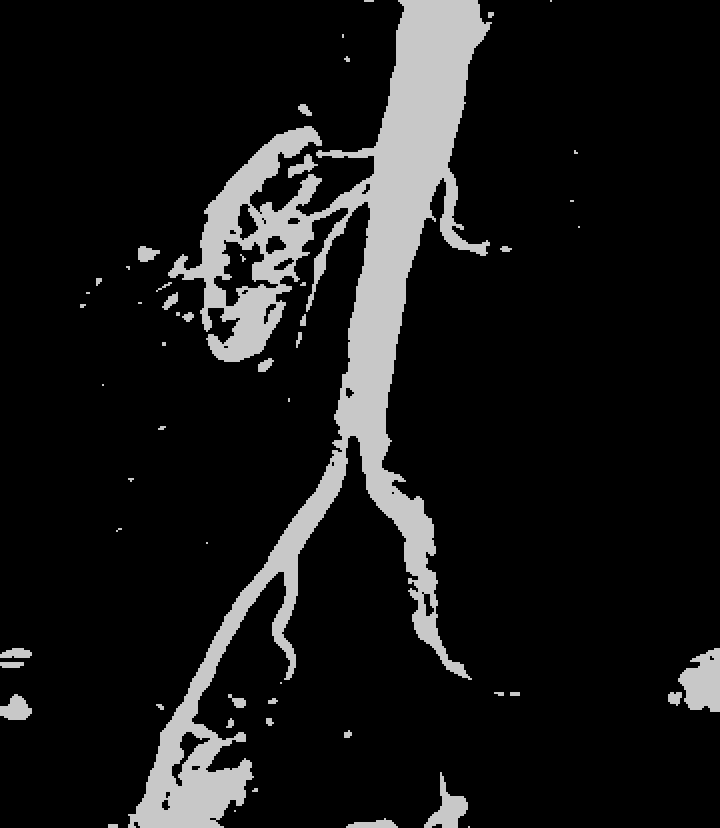

In [25]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('/content/Fig0312(a)(kidney).tif')
img_out = np.zeros(img_in.shape)

a = 150
b = 230

for y in range(img_in.shape[0]):
    for x in range(img_in.shape[1]):
        for c in range(img_in.shape[2]):
            if a <= img_in[y,x,c] and img_in[y,x,c] <= b:
              img_out[y,x,c] = 200

cv2_imshow(img_in)
cv2_imshow(img_out)

Outra forma é fazer uma modificação apenas em um valor específico mantendo a imagem igual para os outros níveis de intensidade, conforme presente no gráfico abaixo.

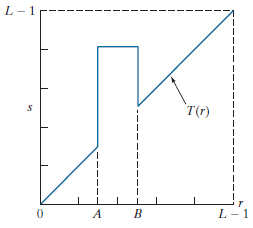

Para o código então foi feito uma cópia da imagem de entrada, e onde for definido os limites de itensidade desejado é feito a modificação do realce nesse caso definido para o nível de itensidade 200. Deve ser notado que para esse caso deve ser definido um valor de itensidade adequado, ou uma cor se trabalho com os canais, para que o conteúdo em destaque não se mescle com resto da imagem (fazendo o contrário do propósito da técnica).

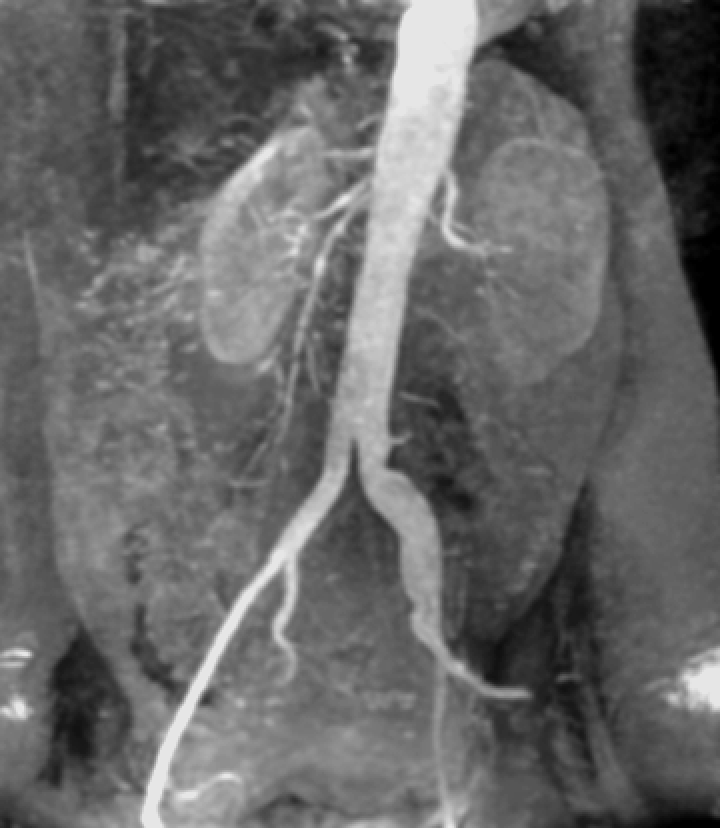

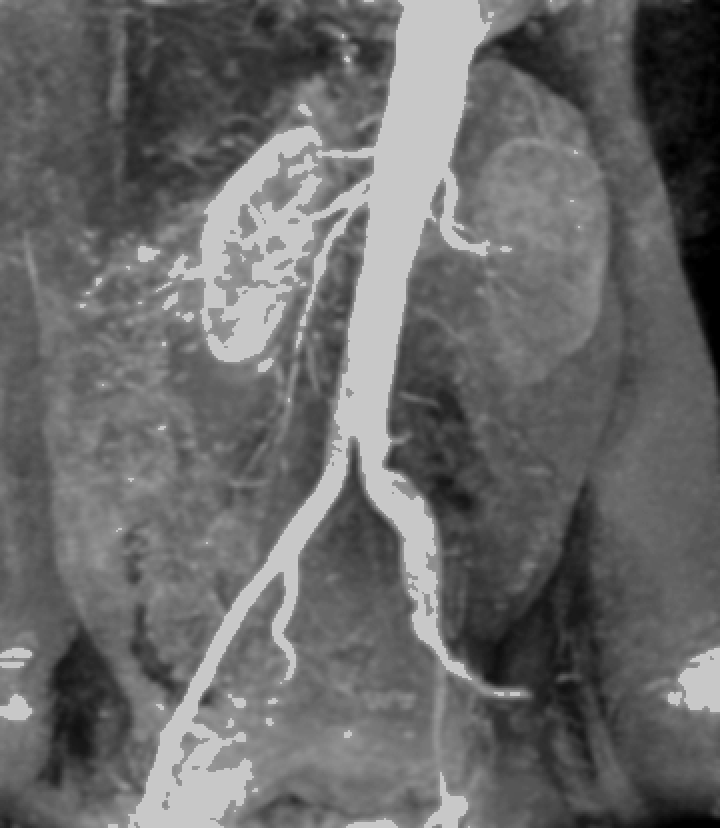

In [26]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('/content/Fig0312(a)(kidney).tif')
img_out = img_in.copy()

a = 150
b = 230

for y in range(img_in.shape[0]):
    for x in range(img_in.shape[1]):
        for c in range(img_in.shape[2]):
            if a <= img_in[y,x,c] and img_in[y,x,c] <= b:
              img_out[y,x,c] = 200

cv2_imshow(img_in)
cv2_imshow(img_out)

# Referências
<br>
https://mmuratarat.github.io/2020-05-13/rgb_to_grayscale_formulas
<br><br>
https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
<br><br>

BURGER, W.; BURGE, M. **Digital Image Processing: An Algorithmic In-
troduction Using Java** . Springer London, 2016. (Texts in Computer Science).
ISBN 9781447166849. Disponível em: <https://books.google.com.br/books?id=
YpzWCwAAQBAJ>. <br><br>



GONZALEZ, R.; WOODS, R. **Digital Image Processing**. Pearson, 2018.
ISBN 9781292223049. Disponível em: <https://books.google.com.br/books?id=
XmZvtAEACAAJ>.
<br><br>
Banco de Imagens:<br>
https://imageprocessingplace.com/root_files_V3/image_databases.htm
